In [42]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec



In [43]:
df = pd.read_csv('preprocessed_text.csv')
df = df.dropna()

In [44]:
poems = df['cleaned_text'].tolist()
model = Word2Vec(poems, vector_size=100, window=5, min_count=1, sg=1)


In [45]:
import numpy as np
poem_vectors = []
for poem in poems:
    poem_vector = np.mean([model.wv[word] for word in poem if word in model.wv], axis=0)
    poem_vectors.append(poem_vector)

# Convert list to a numpy array
poem_vectors = np.array(poem_vectors)


In [46]:
poem_vectors = np.nan_to_num(poem_vectors)


In [47]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input

# Define the autoencoder
input_dim = poem_vectors.shape[1]
input_layer = Input(shape=(input_dim,))
encoded = Dense(64, activation='relu')(input_layer)
encoded = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(poem_vectors, poem_vectors, epochs=100, batch_size=8, shuffle=True)

# Get the encoded (latent) vectors
encoder = Model(input_layer, encoded)
encoded_poem_vectors = encoder.predict(poem_vectors)


Epoch 1/100
5/5 [==============================] - 2s 7ms/step - loss: 0.2486
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 0.2427
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 0.2332
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 0.2182
Epoch 5/100
5/5 [==============================] - 0s 6ms/step - loss: 0.1953
Epoch 6/100
5/5 [==============================] - 0s 6ms/step - loss: 0.1629
Epoch 7/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1222
Epoch 8/100
5/5 [==============================] - 0s 6ms/step - loss: 0.0799
Epoch 9/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0457
Epoch 10/100
5/5 [==============================] - 0s 6ms/step - loss: 0.0247
Epoch 11/100
5/5 [==============================] - 0s 6ms/step - loss: 0.0147
Epoch 12/100
5/5 [==============================] - 0s 6ms/step - loss: 0.0107
Epoch 13/100
5/5 [==============================] - 0s 7ms/st

In [57]:
from sklearn.cluster import KMeans

# Perform k-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(encoded_poem_vectors)

# Add cluster labels to the dataframe
df['cluster'] = clusters

# Save the results back to a CSV
df.to_csv('clustered_poems.csv', index=False)


C:\Users\Acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [58]:
df

,Title,cleaned_text,cluster
0,भिखारी,beggar stand still pitiful eye look silent lig...,0
1,बादल,offspring vast water born summer heat festive ...,3
2,तिनको घँसिया गीत,velvetsoft grassy green roof mountain lush bea...,1
3,सन्ध्या,lalitpurs highart craftsmanship wonder chisel ...,1
4,सम्झना,cloud gather sky sadness descends upon life ta...,0
5,यात्री,temple traveler temple seek offering carry pla...,3
6,प्रश्नोत्तर,nectar drink god earn honest everyone seek hap...,0
7,आफ्नो घर,thought enter sharp fill heart light dark nigh...,1
9,वृक्ष,tree stand tall spread wide dense cool leaf wh...,3
10,गरीब,poor rich happiness wont wealth anywhere world...,1


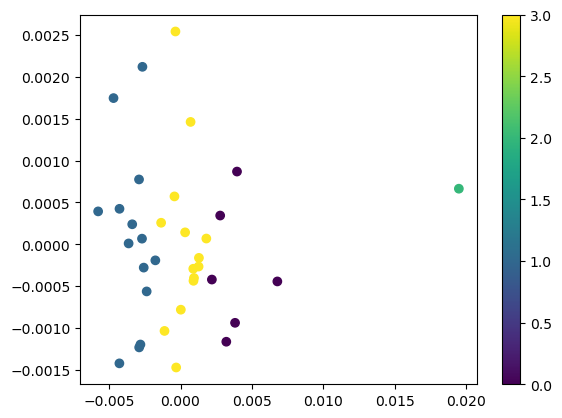

In [59]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(encoded_poem_vectors)

plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], c=clusters)
plt.colorbar()
plt.show()
